In [1]:
import pandas as pd
from PIL import Image
import numpy as np 
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from scipy.stats import norm
from skimage import exposure
from skimage import io, color,filters,feature
import warnings
warnings.filterwarnings("ignore")
import timeit

In [2]:
def mean_shift(img, h=0.5, n=10):
    H, W = img.shape[:2]
    img1 = img.copy()
    img2 = img.copy()
    gif_arr = []
    for i in range(n):
        for y in range(H):
            for x in range(W):
                k = np.square((img1[y,x]-img1)/h).sum(-1)
                k = np.exp(-k)
                a = ((img1-img1[y,x]) * np.expand_dims(k,-1)).sum((0,1))
                grad = a/k.sum()
                img2[y,x] +=  grad
                if x%20 == 0 and y%20==0:
                    gif_arr.append((255*img2).astype(np.uint8))
            print('Progress: {:.02f}{}'.format(100*(i*H+y+1)/n/H,'%'), end='\r')
        img1 = img2
    return img1

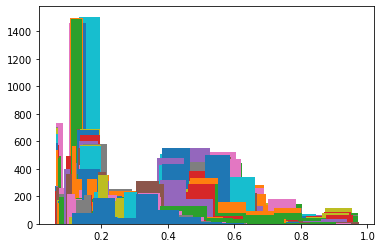

In [3]:
start =  timeit.default_timer()
for taille in range(1,21):
    
    Path = 'C:/Users/USER/Desktop/stage ing/Stage ing partie 5/data_image/C_' + str(taille) + '/'
    Path_g = 'C:/Users/USER/Desktop/stage ing/Stage ing partie 5/data_mask_binary/C_' + str(taille) + '/'
    Path_out = 'C:/Users/USER/Desktop/stage ing/Stage ing partie 5/Meanshift/'
    Path_out1 = 'C:/Users/USER/Desktop/stage ing/Stage ing partie 5/Meanshift/C_' + str(taille) + '/'
    
    l = os.listdir(Path)
    n = 256
    Sx = np.zeros((n,len(l)))
    Sy = np.zeros((len(l),n))

    for t in range(len(l)):
        im = io.imread(Path_g +l[t], as_gray=True)
        Ax = np.zeros(n)
        Ay = np.zeros(n)
        for y in range(n):
            Ax += im[:,y]
            Ay += im[y,:]
        Ax = Ax /n
        Ay = Ay /n
        Sx[:,t]= Ax
        Sy[t,:]= Ay
    
    AIVx =  np.zeros(n)
    AIVy =  np.zeros(n)
    for t in range(len(l)):
        AIVx += Sx[:,t]
        AIVy += Sy[t,:]
    AIVx = AIVx / len(l)
    AIVy = AIVy / len(l)

    TIVx = np.zeros(n)
    TIVy = np.zeros(n)
    for t in range(len(l)):
        TIVx += np.abs(Sx[:,t] - AIVx) 
        TIVy += np.abs(Sy[t,:] - AIVy) 
    TIVx = TIVx /len(l)
    TIVx = TIVx.reshape(n)
    TIVy = TIVy /len(l)
    TIVy = TIVy.reshape(n)
    
    #if taille == 1 :
        #ax = plt.plot(TIVx)
        #ax= plt.plot(TIVy)
        #plt.legend(['TIVx','TIVy'])
        #plt.show()
    
    xx = np.where(TIVx > (max(TIVx)/4))
    ptx1 = xx[0][0]
    ptx2 = xx[0][-1]
    yy = np.where(TIVy > (max(TIVy)/4))
    pty1 = yy[0][0]
    pty2 = yy[0][-1]
    
    #print(ptx1,ptx2,pty1,pty2)
    #if Path_out1 not in os.listdir(Path_out): 
        #os.mkdir(Path_out1)

    for t in range(len(l)):
        im = Image.open(Path+l[t])
        gt = sum(sum(np.array(Image.open(Path_g + l[t]))/256))
        im = np.array(im)/255
        im1=im[ptx1:ptx2,pty1:pty2,:]
        im2 =  mean_shift(im1, h=0.03, n=15)
        im2 = color.rgb2gray(im2)
        img22 = np.zeros((im2.shape[0],im2.shape[1]))
        img21 = np.zeros((im2.shape[0],im2.shape[1]))
        val = pd.DataFrame(plt.hist(im2.ravel())).T.sort_values([0],ascending=False).head(2)[1].unique()
        val1 =val[0]
        val2 =val[1]
        count1=0
        count2=0 
        
        for i in range(im2.shape[0]):
            for j in range(im2.shape[1]):
                if (im2[i,j]<=val1):
                    count1+=1
                    img21[i,j]=255
                if (im2[i,j]<=val2):
                    count2+=1
                    img22[i,j]=255

        if (abs(gt-count1)>abs(gt-count2)):
            img2 = img22
        else:
            img2 = img21
            
        im3= np.zeros((n,n))
        im3[ptx1:ptx2,pty1:pty2]=img2
        #plt.imshow(im3,cmap='gray')
        im3 = Image.fromarray(im3.astype(np.uint8))
        #im3.save(Path_out1 + l[t])
        #plt.show()

In [4]:
end = timeit.default_timer()

In [7]:
round((end - start)/20,3)

50.315